In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
base_name = "1603053657497A" # Имя файла без разрешения
df = pd.read_parquet(f"data/{base_name}.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909965 entries, 0 to 909964
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   angDist       909965 non-null  float64
 1   RAJ2000       909965 non-null  float64
 2   DEJ2000       909965 non-null  float64
 3   errHalfMaj    909965 non-null  float64
 4   errHalfMin    909965 non-null  float64
 5   errPosAng     909965 non-null  int64  
 6   field         909965 non-null  int64  
 7   nobs          909965 non-null  int64  
 8   mobs          909965 non-null  int64  
 9   B-V           784258 non-null  float64
 10  e_B-V         784258 non-null  float64
 11  Vmag          791592 non-null  float64
 12  e_Vmag        791592 non-null  float64
 13  u_e_Vmag      791592 non-null  float64
 14  Bmag          790480 non-null  float64
 15  e_Bmag        790480 non-null  float64
 16  u_e_Bmag      790480 non-null  float64
 17  gpmag         804351 non-null  float64
 18  e_gp

## Проверка даненых
Давайте проверим, что наши данные что то из себя представляют. Например с посощью спектроскопии. должно получиться что то похожее на:

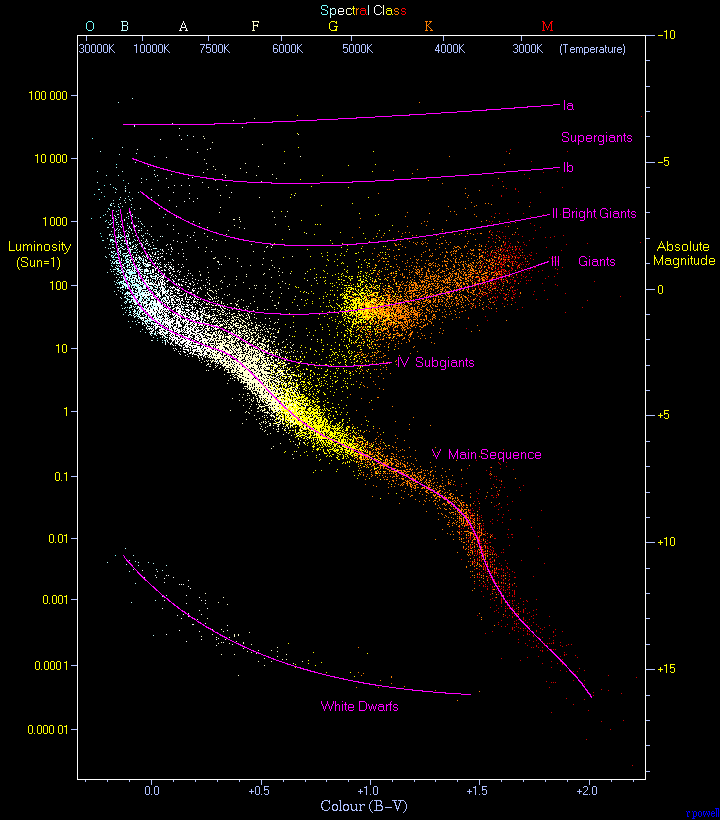

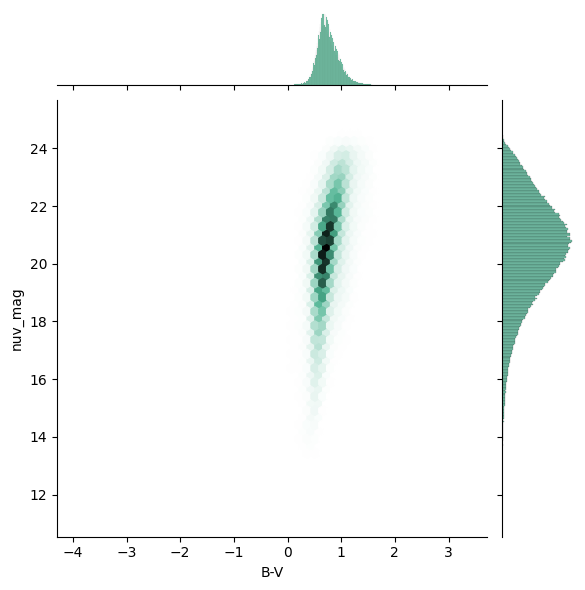

In [287]:
sns.jointplot(data=df, x="B-V", y="nuv_mag", kind="hex", color="#4CB391", )


In [288]:
df = df.drop(columns="objtype")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69564 entries, 1 to 909963
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   angDist       69564 non-null  float64
 1   RAJ2000       69564 non-null  float64
 2   DEJ2000       69564 non-null  float64
 3   errHalfMaj    69564 non-null  float64
 4   errHalfMin    69564 non-null  float64
 5   errPosAng     69564 non-null  int64  
 6   field         69564 non-null  int64  
 7   nobs          69564 non-null  int64  
 8   mobs          69564 non-null  int64  
 9   B-V           69564 non-null  float64
 10  e_B-V         69564 non-null  float64
 11  Vmag          69564 non-null  float64
 12  e_Vmag        69564 non-null  float64
 13  u_e_Vmag      69564 non-null  float64
 14  Bmag          69564 non-null  float64
 15  e_Bmag        69564 non-null  float64
 16  u_e_Bmag      69564 non-null  float64
 17  gpmag         69564 non-null  float64
 18  e_gpmag       69564 non-null  

In [289]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# X = df.sample(n=1000)
X = StandardScaler().fit_transform(df)

# 2. Кластеризация (например, K-means)
kmeans = KMeans(n_clusters=7)
clusters = kmeans.fit_predict(X)

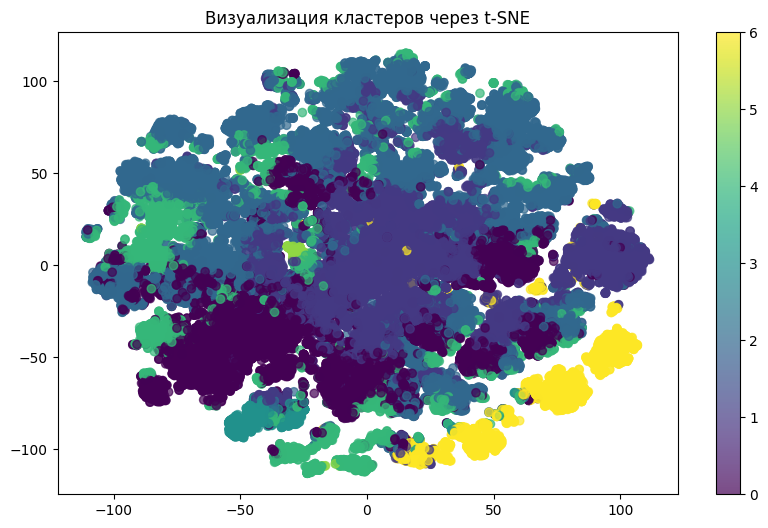

In [290]:
# 3. Снижение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X)

# 4. Визуализация кластеров в 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Визуализация кластеров через t-SNE')
plt.colorbar()
plt.show()